In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, ttest_ind
from geopy.distance import geodesic

In [2]:
df= pd.read_csv("merged_dataset.csv")

In [3]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,...,468.0,3.0,450.0,30.0,10.0,20.0,31842.0,belo horizonte,MG,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,316.0,4.0,250.0,51.0,15.0,15.0,8752.0,mogi das cruzes,SP,stationery


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113425 entries, 0 to 113424
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113425 non-null  object 
 1   customer_id                    113425 non-null  object 
 2   order_status                   113425 non-null  object 
 3   order_purchase_timestamp       113425 non-null  object 
 4   order_approved_at              113264 non-null  object 
 5   order_delivered_carrier_date   111457 non-null  object 
 6   order_delivered_customer_date  110196 non-null  object 
 7   order_estimated_delivery_date  113425 non-null  object 
 8   customer_unique_id             113425 non-null  object 
 9   customer_zip_code_prefix       113425 non-null  int64  
 10  customer_city                  113425 non-null  object 
 11  customer_state                 113425 non-null  object 
 12  order_item_id                 

In [5]:
print(df.isnull().sum())

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 161
order_delivered_carrier_date     1968
order_delivered_customer_date    3229
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_item_id                     775
product_id                        775
seller_id                         775
shipping_limit_date               775
price                             775
freight_value                     775
product_category_name            2378
product_name_lenght              2378
product_description_lenght       2378
product_photos_qty               2378
product_weight_g                 2378
product_length_cm                2378
product_height_cm                2378
product_width_cm                 2378
seller_zip_c

In [6]:
df.dtypes

order_id                          object
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
customer_unique_id                object
customer_zip_code_prefix           int64
customer_city                     object
customer_state                    object
order_item_id                    float64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
product_category_name             object
product_name_lenght              float64
product_description_lenght       float64
product_photos_qty               float64
product_weight_g                 float64
product_length_cm                float64
product_height_c

In [7]:
# Convert date columns to datetime format
date_cols = [
    "order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date",
    "order_delivered_customer_date", "order_estimated_delivery_date", "shipping_limit_date"
]
df[date_cols] = df[date_cols].apply(pd.to_datetime, errors='coerce')

# Convert order_item_id to integer (if no missing values)
df["order_item_id"] = df["order_item_id"].fillna(0).astype(int)

In [8]:
df.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
order_item_id                             int64
product_id                               object
seller_id                                object
shipping_limit_date              datetime64[ns]
price                                   float64
freight_value                           float64
product_category_name                    object
product_name_lenght                     float64
product_description_lenght              

In [9]:
print(df.isnull().sum())

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 161
order_delivered_carrier_date     1968
order_delivered_customer_date    3229
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_item_id                       0
product_id                        775
seller_id                         775
shipping_limit_date               775
price                             775
freight_value                     775
product_category_name            2378
product_name_lenght              2378
product_description_lenght       2378
product_photos_qty               2378
product_weight_g                 2378
product_length_cm                2378
product_height_cm                2378
product_width_cm                 2378
seller_zip_c

In [10]:
required_cols = [
    "order_delivered_customer_date", "order_estimated_delivery_date",
    "product_id", "seller_id", "price", "freight_value",
    "product_category_name_english", "product_weight_g", "product_length_cm",
    "product_height_cm", "product_width_cm", "seller_zip_code_prefix",
    "seller_city", "seller_state"
]
df_cleaned = df.dropna(subset=required_cols)


In [11]:
print("Remaining missing values in cleaned dataset:", df_cleaned.isnull().sum().sum())

Remaining missing values in cleaned dataset: 15


In [12]:
print(df.isnull().sum())

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 161
order_delivered_carrier_date     1968
order_delivered_customer_date    3229
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_item_id                       0
product_id                        775
seller_id                         775
shipping_limit_date               775
price                             775
freight_value                     775
product_category_name            2378
product_name_lenght              2378
product_description_lenght       2378
product_photos_qty               2378
product_weight_g                 2378
product_length_cm                2378
product_height_cm                2378
product_width_cm                 2378
seller_zip_c

In [13]:
# Reset index after dropping rows
df_cleaned.reset_index(drop=True, inplace=True)

# Check if all null values are removed
print(df_cleaned.isnull().sum())  


order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      1
order_delivered_customer_date     0
order_estimated_delivery_date     0
customer_unique_id                0
customer_zip_code_prefix          0
customer_city                     0
customer_state                    0
order_item_id                     0
product_id                        0
seller_id                         0
shipping_limit_date               0
price                             0
freight_value                     0
product_category_name             0
product_name_lenght               0
product_description_lenght        0
product_photos_qty                0
product_weight_g                  0
product_length_cm                 0
product_height_cm                 0
product_width_cm                  0
seller_zip_code_prefix            0
seller_city                 

In [14]:
# Create a new column 'late_delivery'
df_cleaned["late_delivery"] = df_cleaned["order_delivered_customer_date"] > df_cleaned["order_estimated_delivery_date"]

# Convert Boolean to 'Yes' or 'No'
df_cleaned["late_delivery"] = df_cleaned["late_delivery"].replace({True: "Yes", False: "No"})

# Check the first few rows
print(df_cleaned[["order_delivered_customer_date", "order_estimated_delivery_date", "late_delivery"]].head())
# Convert 'late_delivery' column to binary (1 for late, 0 for on-time)
df_cleaned["late_delivery"] = df_cleaned["late_delivery"].map({"Yes": 1, "No": 0})

  order_delivered_customer_date order_estimated_delivery_date late_delivery
0           2017-10-10 21:25:13                    2017-10-18            No
1           2018-08-07 15:27:45                    2018-08-13            No
2           2018-08-17 18:06:29                    2018-09-04            No
3           2017-12-02 00:28:42                    2017-12-15            No
4           2018-02-16 18:17:02                    2018-02-26            No


/var/folders/13/3qsjyhzx365f0qdkt8rlzvvh0000gn/T/ipykernel_91460/2173622284.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["late_delivery"] = df_cleaned["order_delivered_customer_date"] > df_cleaned["order_estimated_delivery_date"]
/var/folders/13/3qsjyhzx365f0qdkt8rlzvvh0000gn/T/ipykernel_91460/2173622284.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["late_delivery"] = df_cleaned["late_delivery"].replace({True: "Yes", False: "No"})
/var/folders/13/3qsjyhzx365f0qdkt8rlzvvh00

In [15]:
df_cleaned.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,late_delivery
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares,0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP,perfumery,0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP,auto,0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,...,3.0,450.0,30.0,10.0,20.0,31842.0,belo horizonte,MG,pet_shop,0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,4.0,250.0,51.0,15.0,15.0,8752.0,mogi das cruzes,SP,stationery,0


In [16]:
df_cleaned.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
order_item_id                             int64
product_id                               object
seller_id                                object
shipping_limit_date              datetime64[ns]
price                                   float64
freight_value                           float64
product_category_name                    object
product_name_lenght                     float64
product_description_lenght              

In [17]:
# Extract the month and create a new column
df_cleaned["order_purchase_month"] = df_cleaned["order_purchase_timestamp"].dt.month

/var/folders/13/3qsjyhzx365f0qdkt8rlzvvh0000gn/T/ipykernel_91460/154057660.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["order_purchase_month"] = df_cleaned["order_purchase_timestamp"].dt.month


In [18]:
df_cleaned.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,late_delivery,order_purchase_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares,0,10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP,perfumery,0,7
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,420.0,24.0,19.0,21.0,14840.0,guariba,SP,auto,0,8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,...,450.0,30.0,10.0,20.0,31842.0,belo horizonte,MG,pet_shop,0,11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,250.0,51.0,15.0,15.0,8752.0,mogi das cruzes,SP,stationery,0,2


In [19]:
df_cleaned["order_purchase_weekday"] = df_cleaned["order_purchase_timestamp"].dt.weekday + 1

/var/folders/13/3qsjyhzx365f0qdkt8rlzvvh0000gn/T/ipykernel_91460/2845053913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["order_purchase_weekday"] = df_cleaned["order_purchase_timestamp"].dt.weekday + 1


/var/folders/13/3qsjyhzx365f0qdkt8rlzvvh0000gn/T/ipykernel_91460/674437463.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="late_delivery", data=df_cleaned, palette="coolwarm")


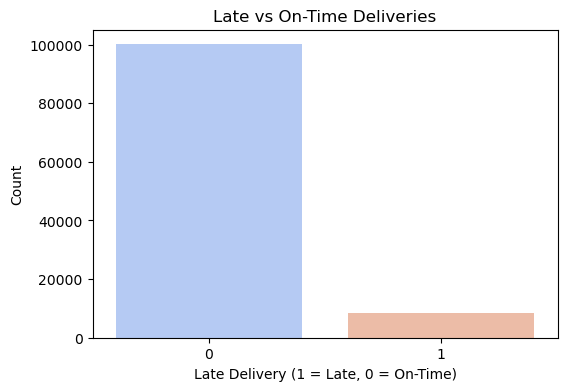

In [20]:
plt.figure(figsize=(6,4))
sns.countplot(x="late_delivery", data=df_cleaned, palette="coolwarm")
plt.title("Late vs On-Time Deliveries")
plt.xlabel("Late Delivery (1 = Late, 0 = On-Time)")
plt.ylabel("Count")
plt.show()

In [21]:
print("Total number of rows:", df_cleaned.shape[0])

Total number of rows: 108637


In [22]:
# Count the total number of unique purchases (orders)
total_purchases = df_cleaned['order_id'].nunique()

# Count the number of late deliveries (where late_delivery = 1)
late_deliveries = df_cleaned['late_delivery'].sum()

# Calculate the ratio of late deliveries to total purchases
late_delivery_ratio = late_deliveries / total_purchases

# Print the results
print(f"Total number of purchases: {total_purchases}")
print(f"Total number of late deliveries: {late_deliveries}")
print(f"Late delivery ratio: {late_delivery_ratio:.4f}")

Total number of purchases: 95125
Total number of late deliveries: 8570
Late delivery ratio: 0.0901


/var/folders/13/3qsjyhzx365f0qdkt8rlzvvh0000gn/T/ipykernel_91460/1659053155.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["order_month"] = df_cleaned["order_purchase_timestamp"].dt.to_period("M").astype(str)


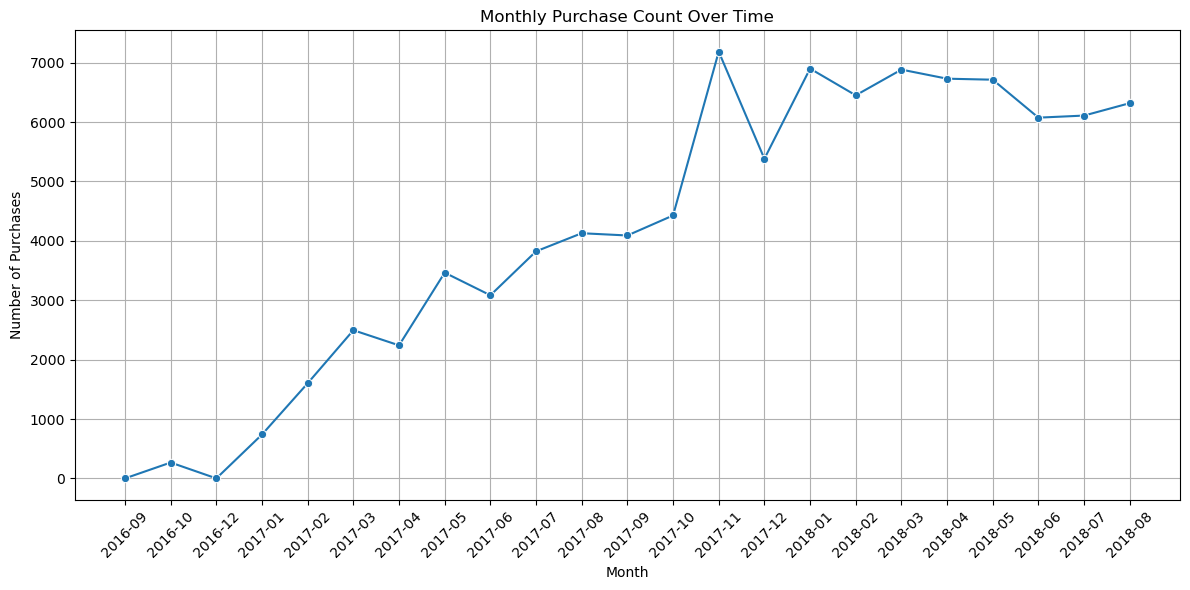

In [23]:
df_cleaned["order_month"] = df_cleaned["order_purchase_timestamp"].dt.to_period("M").astype(str)

# Group by month and count unique purchases
monthly_purchases = df_cleaned.groupby("order_month")["order_id"].nunique().reset_index()
monthly_purchases.columns = ["Month", "Purchase Count"]

# Sort the data chronologically
monthly_purchases = monthly_purchases.sort_values("Month")

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_purchases, x="Month", y="Purchase Count", marker="o")
plt.title("Monthly Purchase Count Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

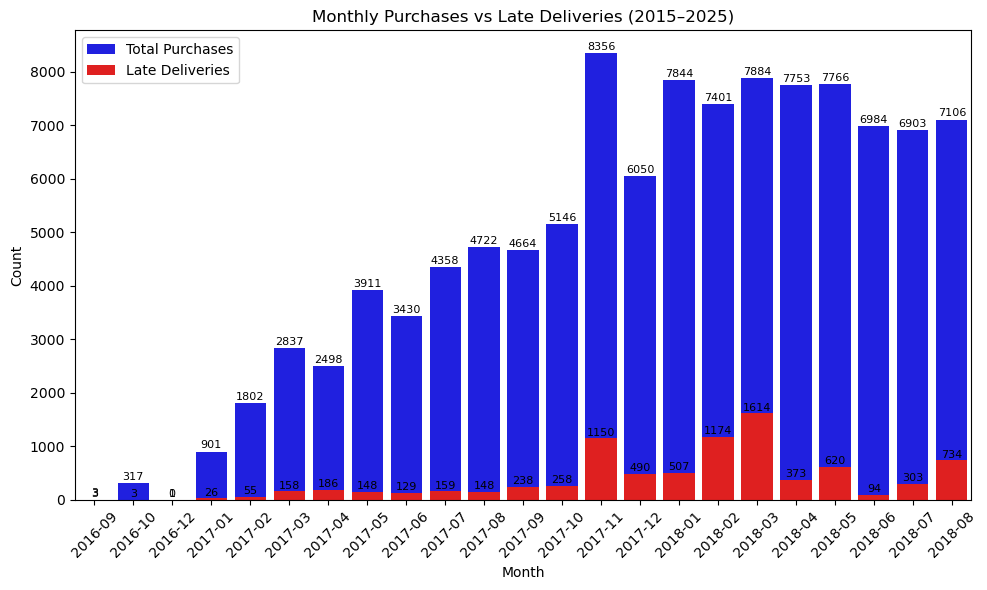

In [24]:
# Filter for the desired time range
df_filtered = df_cleaned[(df_cleaned['order_purchase_timestamp'].dt.year >= 2015) & 
                         (df_cleaned['order_purchase_timestamp'].dt.year <= 2019)]

# Group by month and compute total & late deliveries
monthly_counts = df_filtered.groupby(df_filtered['order_purchase_timestamp'].dt.to_period('M')).agg(
    total_purchases=('order_id', 'count'),
    late_deliveries=('late_delivery', 'sum')
).reset_index()

# Convert the period to string for plotting
monthly_counts['order_purchase_timestamp'] = monthly_counts['order_purchase_timestamp'].astype(str)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='order_purchase_timestamp', y='total_purchases', data=monthly_counts, color='blue', label="Total Purchases")
sns.barplot(x='order_purchase_timestamp', y='late_deliveries', data=monthly_counts, color='red', label="Late Deliveries")

# Annotate bars
for i, (total, late) in enumerate(zip(monthly_counts['total_purchases'], monthly_counts['late_deliveries'])):
    plt.text(i, total + 20, str(total), color='black', ha='center', va='bottom', fontsize=8)
    plt.text(i, late + 10, str(late), color='black', ha='center', va='bottom', fontsize=8)

# Final plot formatting
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Monthly Purchases vs Late Deliveries (2015–2025)")
plt.legend()
plt.tight_layout()
plt.show()

In [25]:
# Group by product category and compute total and late orders
category_late_stats = df_cleaned.groupby("product_category_name_english").agg(
    total_orders=('order_id', 'count'),
    late_deliveries=('late_delivery', 'sum')
)

# Calculate the late delivery rate per category
category_late_stats['late_rate'] = category_late_stats['late_deliveries'] / category_late_stats['total_orders']

# Filter to only show categories with a reasonable number of orders (e.g., > 100)
category_late_stats = category_late_stats[category_late_stats['total_orders'] > 200]

# Sort by late delivery rate
category_late_stats_sorted = category_late_stats.sort_values(by='late_rate', ascending=False)

/var/folders/13/3qsjyhzx365f0qdkt8rlzvvh0000gn/T/ipykernel_91460/2109291218.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


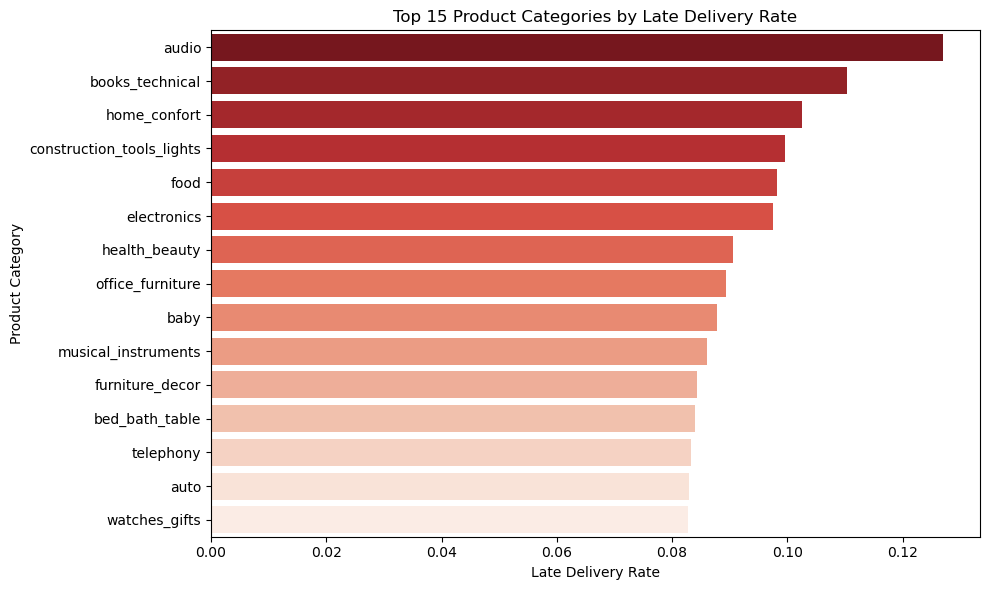

In [26]:
# Plot the top 15 categories with highest late delivery rate
plt.figure(figsize=(10, 6))
sns.barplot(
    data=category_late_stats_sorted.head(15),
    y=category_late_stats_sorted.head(15).index,
    x="late_rate",
    palette="Reds_r"
)
plt.title("Top 15 Product Categories by Late Delivery Rate")
plt.xlabel("Late Delivery Rate")
plt.ylabel("Product Category")
plt.tight_layout()
plt.show()

/var/folders/13/3qsjyhzx365f0qdkt8rlzvvh0000gn/T/ipykernel_91460/160267743.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='late_delivery', y='price', data=df_cleaned, palette='Set2')


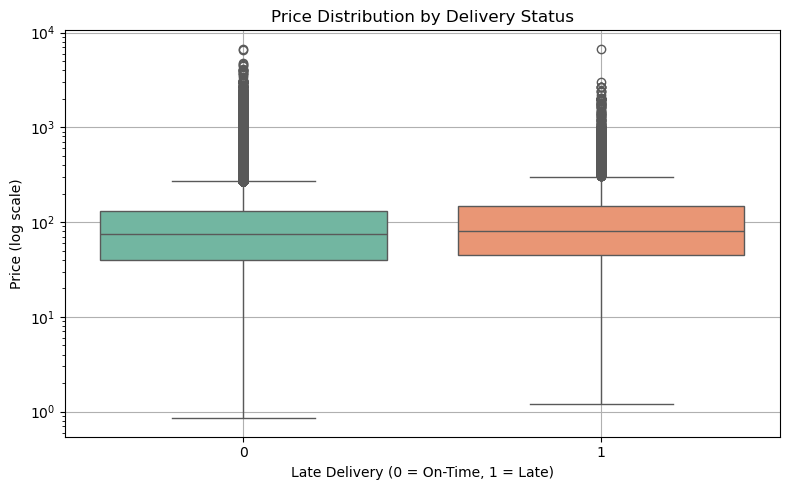

In [27]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='late_delivery', y='price', data=df_cleaned, palette='Set2')
plt.title("Price Distribution by Delivery Status")
plt.xlabel("Late Delivery (0 = On-Time, 1 = Late)")
plt.ylabel("Price (log scale)")
plt.yscale("log")
plt.grid(True)
plt.tight_layout()
plt.show()

In [28]:
df_cleaned["product_volume_cm3"] = (
    df_cleaned["product_length_cm"] *
    df_cleaned["product_width_cm"] *
    df_cleaned["product_height_cm"]
)

# Convert weight to kilograms
df_cleaned["product_weight_kg"] = df_cleaned["product_weight_g"] / 1000

# Create a bulkiness score (volume × weight)
df_cleaned["product_bulk_score"] = df_cleaned["product_volume_cm3"] * df_cleaned["product_weight_kg"]

# Preview the new features
df_cleaned[["product_volume_cm3", "product_weight_kg", "product_bulk_score"]].describe()

/var/folders/13/3qsjyhzx365f0qdkt8rlzvvh0000gn/T/ipykernel_91460/1643723051.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["product_volume_cm3"] = (
/var/folders/13/3qsjyhzx365f0qdkt8rlzvvh0000gn/T/ipykernel_91460/1643723051.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["product_weight_kg"] = df_cleaned["product_weight_g"] / 1000
/var/folders/13/3qsjyhzx365f0qdkt8rlzvvh0000gn/T/ipykernel_91460/1643723051.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy o

,product_volume_cm3,product_weight_kg,product_bulk_score
count,108637.000000,108637.000000,1.086370e+05
mean,15221.485139,2.095559,1.020027e+05
std,23267.025838,3.744395,4.385939e+05
min,168.000000,0.000000,0.000000e+00
25%,2856.000000,0.300000,8.452500e+02
50%,6552.000000,0.700000,4.596800e+03
75%,18375.000000,1.800000,3.063750e+04
max,296208.000000,40.425000,8.820000e+06


In [29]:
# Group by product category and compute required metrics
category_weight_stats = df_cleaned.groupby("product_category_name_english").agg(
    total_orders=('order_id', 'count'),
    late_deliveries=('late_delivery', 'sum'),
    avg_weight_kg=('product_weight_kg', 'mean')
).reset_index()

# Calculate late delivery rate
category_weight_stats['late_rate'] = category_weight_stats['late_deliveries'] / category_weight_stats['total_orders']

# Filter to only include categories with a reasonable number of orders
category_weight_stats = category_weight_stats[category_weight_stats['total_orders'] > 100]

# Sort by late rate and take top 15
category_weight_stats_sorted = category_weight_stats.sort_values('late_rate', ascending=False).head(15)


/var/folders/13/3qsjyhzx365f0qdkt8rlzvvh0000gn/T/ipykernel_91460/1616955660.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


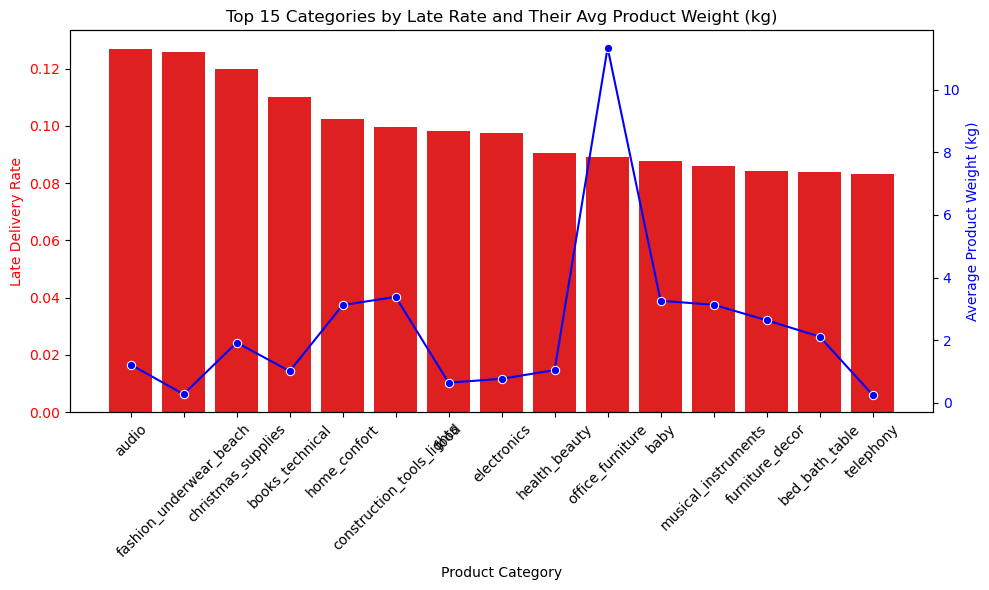

In [30]:
# Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for late rate
sns.barplot(x='product_category_name_english', y='late_rate', data=category_weight_stats_sorted, color='red', ax=ax1)
ax1.set_ylabel("Late Delivery Rate", color='red')
ax1.set_xlabel("Product Category")
ax1.tick_params(axis='y', labelcolor='red')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.set_title("Top 15 Categories by Late Rate and Their Avg Product Weight (kg)")

# Line plot for average weight on secondary axis
ax2 = ax1.twinx()
sns.lineplot(x='product_category_name_english', y='avg_weight_kg', data=category_weight_stats_sorted, color='blue', marker='o', ax=ax2)
ax2.set_ylabel("Average Product Weight (kg)", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.tight_layout()
plt.show()

In [31]:
correlation, p_value = pearsonr(
    category_weight_stats["avg_weight_kg"],
    category_weight_stats["late_rate"]
)

# Display results
print(f"Correlation between avg weight and late rate: {correlation:.3f}")
print(f"P-value: {p_value:.3f}")

Correlation between avg weight and late rate: -0.123
P-value: 0.379


In [32]:
#Heavier products are not reliably more likely to be delivered late across all categories.

Correlation Matrix:
                    product_weight_kg     price  late_delivery
product_weight_kg           1.000000  0.339354       0.022971
price                       0.339354  1.000000       0.021109
late_delivery               0.022971  0.021109       1.000000


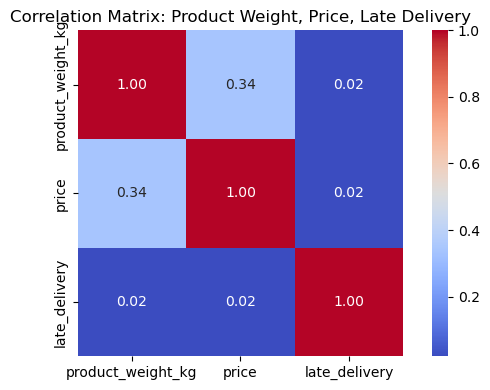

In [33]:
# Select relevant columns for correlation
corr_df = df_cleaned[["product_weight_kg", "price", "late_delivery"]]

# Compute correlation matrix
corr_matrix = corr_df.corr()

# Print correlation matrix
print("Correlation Matrix:\n", corr_matrix)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix: Product Weight, Price, Late Delivery")
plt.tight_layout()
plt.show()


/var/folders/13/3qsjyhzx365f0qdkt8rlzvvh0000gn/T/ipykernel_91460/608469053.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="delivery_status", y="product_weight_kg", data=df_valid, palette="Set2")


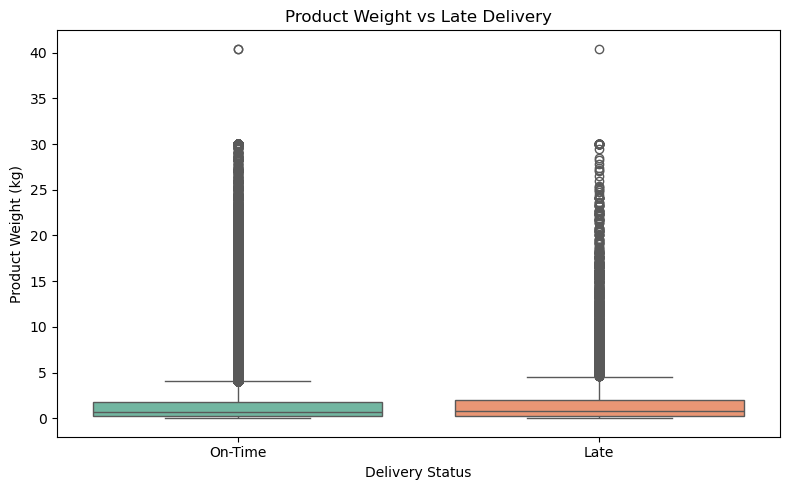

In [34]:
# Filter valid rows
df_valid = df_cleaned[df_cleaned["product_weight_kg"].notnull()]

# Map binary flag to labels for readability
df_valid["delivery_status"] = df_valid["late_delivery"].map({0: "On-Time", 1: "Late"})

# Plot boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x="delivery_status", y="product_weight_kg", data=df_valid, palette="Set2")
plt.title("Product Weight vs Late Delivery")
plt.xlabel("Delivery Status")
plt.ylabel("Product Weight (kg)")
plt.tight_layout()
plt.show()

/var/folders/13/3qsjyhzx365f0qdkt8rlzvvh0000gn/T/ipykernel_91460/550030586.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="seller_state", y="late_ratio", data=state_late_stats, palette="Reds_r")


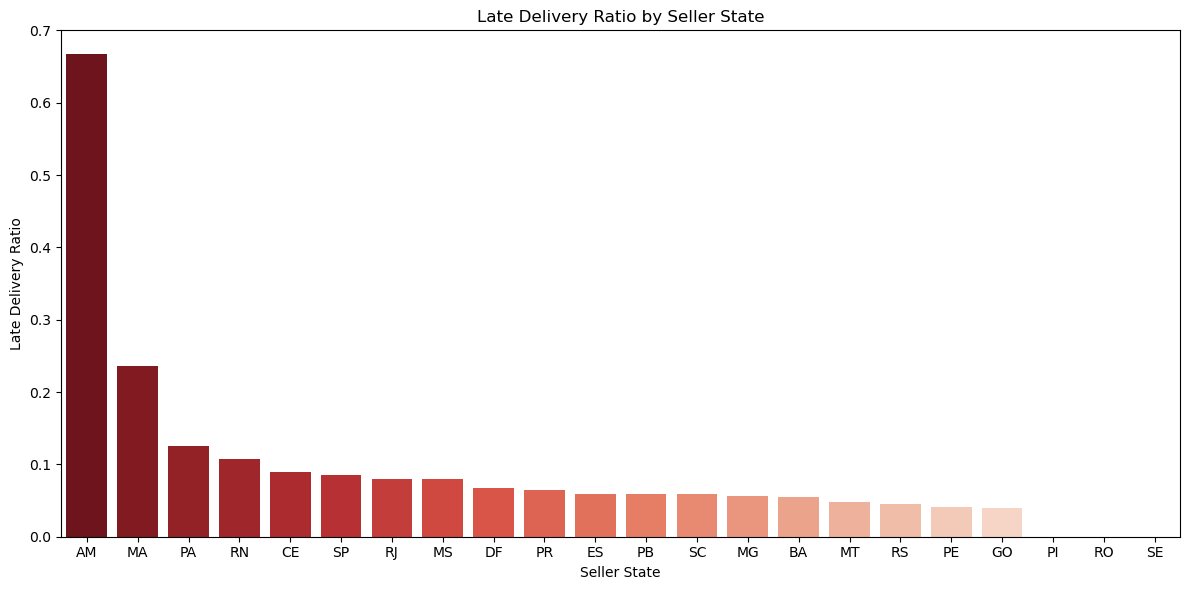

In [35]:
# Group by seller state
state_late_stats = df_cleaned.groupby("seller_state").agg(
    total_orders=('order_id', 'count'),
    late_deliveries=('late_delivery', 'sum')
).reset_index()

# Calculate late delivery ratio
state_late_stats["late_ratio"] = state_late_stats["late_deliveries"] / state_late_stats["total_orders"]

# Sort by late ratio
state_late_stats = state_late_stats.sort_values("late_ratio", ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x="seller_state", y="late_ratio", data=state_late_stats, palette="Reds_r")

plt.title("Late Delivery Ratio by Seller State")
plt.xlabel("Seller State")
plt.ylabel("Late Delivery Ratio")
plt.tight_layout()
plt.show()

/var/folders/13/3qsjyhzx365f0qdkt8rlzvvh0000gn/T/ipykernel_91460/1772769128.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="customer_state", y="late_ratio", data=late_by_customer_state_sorted , palette="Reds_r")


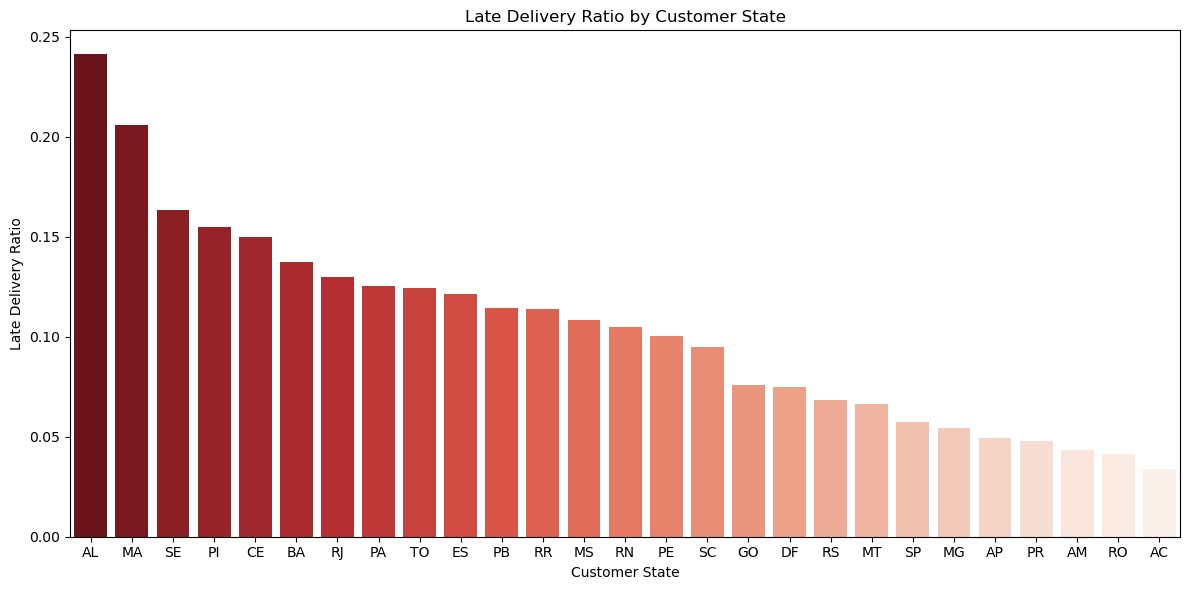

In [36]:
# Group by customer state and calculate total orders and late deliveries
late_by_customer_state = df_cleaned.groupby("customer_state").agg(
    total_orders=("order_id", "count"),
    late_deliveries=("late_delivery", "sum")
)

# Compute the late delivery ratio
late_by_customer_state["late_ratio"] = (
    late_by_customer_state["late_deliveries"] / late_by_customer_state["total_orders"]
)

# Sort by late delivery ratio
late_by_customer_state_sorted = late_by_customer_state.sort_values("late_ratio", ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x="customer_state", y="late_ratio", data=late_by_customer_state_sorted , palette="Reds_r")

plt.title("Late Delivery Ratio by Customer State")
plt.xlabel("Customer State")
plt.ylabel("Late Delivery Ratio")
plt.tight_layout()
plt.show()

/var/folders/13/3qsjyhzx365f0qdkt8rlzvvh0000gn/T/ipykernel_91460/2612433829.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["same_state"] = (df_cleaned["customer_state"] == df_cleaned["seller_state"]).astype(int)
/var/folders/13/3qsjyhzx365f0qdkt8rlzvvh0000gn/T/ipykernel_91460/2612433829.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="State Relation", y="late_delivery", data=state_group, palette="pastel")


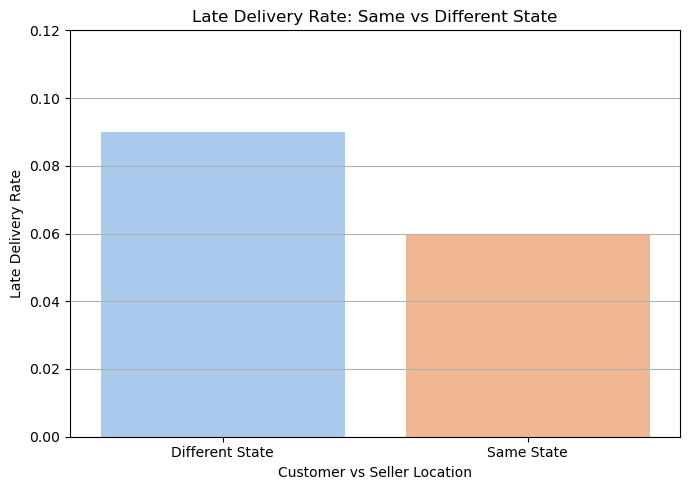

    State Relation  late_delivery
0  Different State       0.089841
1       Same State       0.059554


In [37]:

# 1. Create a flag indicating if seller and customer are in the same state
df_cleaned["same_state"] = (df_cleaned["customer_state"] == df_cleaned["seller_state"]).astype(int)

# 2. Group by same_state and compute late delivery rate
state_group = df_cleaned.groupby("same_state")["late_delivery"].mean().reset_index()
state_group["State Relation"] = state_group["same_state"].map({1: "Same State", 0: "Different State"})

# 3. Plot the late delivery rates
plt.figure(figsize=(7, 5))
sns.barplot(x="State Relation", y="late_delivery", data=state_group, palette="pastel")
plt.title("Late Delivery Rate: Same vs Different State")
plt.ylabel("Late Delivery Rate")
plt.xlabel("Customer vs Seller Location")
plt.ylim(0, 0.12)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Optional: print values
print(state_group[["State Relation", "late_delivery"]])

In [38]:
# Load geolocation data
geo_df = pd.read_csv("cleaned_geolocation.csv")

# Step 1: Aggregate lat/lng per zip prefix
geo_avg = geo_df.groupby("geolocation_zip_code_prefix")[["geolocation_lat", "geolocation_lng"]].mean().reset_index()
geo_avg.columns = ["zip_code_prefix", "lat", "lng"]

# Step 2: Merge with df_cleaned for both customer and seller
df_cleaned = df_cleaned.copy()

In [39]:
# Merge customer coordinates
df_cleaned = df_cleaned.merge(geo_avg, how="left", left_on="customer_zip_code_prefix", right_on="zip_code_prefix")
df_cleaned.rename(columns={"lat": "customer_lat", "lng": "customer_lng"}, inplace=True)
df_cleaned.drop(columns=["zip_code_prefix"], inplace=True)


In [40]:
# Merge seller coordinates
df_cleaned = df_cleaned.merge(geo_avg, how="left", left_on="seller_zip_code_prefix", right_on="zip_code_prefix")
df_cleaned.rename(columns={"lat": "seller_lat", "lng": "seller_lng"}, inplace=True)
df_cleaned.drop(columns=["zip_code_prefix"], inplace=True)


In [41]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    d_phi = np.radians(lat2 - lat1)
    d_lambda = np.radians(lon2 - lon1)

    a = np.sin(d_phi/2.0)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(d_lambda/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c


In [42]:
# Step 4: Compute the distance
df_cleaned["distance_seller_customer_km"] = haversine(
    df_cleaned["customer_lat"], df_cleaned["customer_lng"],
    df_cleaned["seller_lat"], df_cleaned["seller_lng"]
)

# Preview result
print(df_cleaned[["customer_zip_code_prefix", "seller_zip_code_prefix", "distance_seller_customer_km"]].head())

   customer_zip_code_prefix  seller_zip_code_prefix  \
0                      3149                  9350.0   
1                     47813                 31570.0   
2                     75265                 14840.0   
3                     59296                 31842.0   
4                      9195                  8752.0   

   distance_seller_customer_km  
0                    18.538322  
1                   849.520470  
2                   514.407596  
3                  1822.132331  
4                    29.765008  


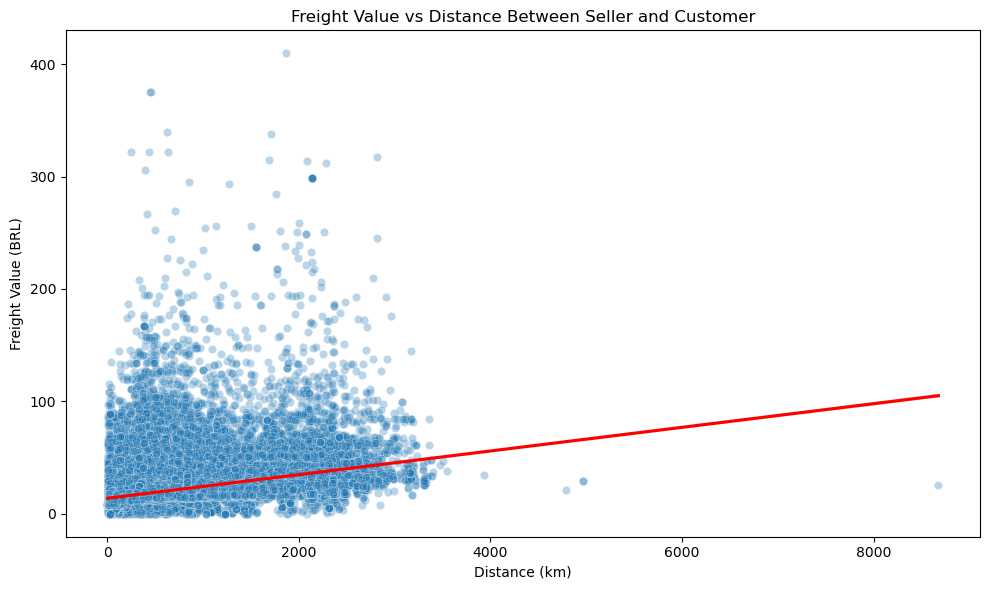

In [43]:
# Filter out rows with missing or zero values (for cleaner correlation)
df_valid = df_cleaned[
    (df_cleaned['freight_value'].notnull()) &
    (df_cleaned['distance_seller_customer_km'].notnull()) &
    (df_cleaned['freight_value'] > 0) &
    (df_cleaned['distance_seller_customer_km'] > 0)
]

# Plot scatterplot with regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_valid, x='distance_seller_customer_km', y='freight_value', alpha=0.3)
sns.regplot(data=df_valid, x='distance_seller_customer_km', y='freight_value', scatter=False, color='red')

plt.title("Freight Value vs Distance Between Seller and Customer")
plt.xlabel("Distance (km)")
plt.ylabel("Freight Value (BRL)")
plt.tight_layout()
plt.show()

In [44]:
# Calculate Pearson correlation
corr, p_value = pearsonr(df_valid['distance_seller_customer_km'], df_valid['freight_value'])

print(f"Pearson Correlation: {corr:.4f}")
print(f"P-value: {p_value:.4f}")

Pearson Correlation: 0.3936
P-value: 0.0000


In [45]:
correlation_matrix = df_cleaned[[
    "freight_value",
    "distance_seller_customer_km",
    "product_weight_kg"
]].corr()

# Display the result
print(correlation_matrix)

                             freight_value  distance_seller_customer_km  \
freight_value                     1.000000                     0.391272   
distance_seller_customer_km       0.391272                     1.000000   
product_weight_kg                 0.611251                    -0.006654   

                             product_weight_kg  
freight_value                         0.611251  
distance_seller_customer_km          -0.006654  
product_weight_kg                     1.000000  


Average Distance (Late): 736.4804755056668
Average Distance (On-Time): 584.7812743795304
Median Distance (Late): 513.3256305012221
Median Distance (On-Time): 425.59258887977336

T-test: t-statistic = 19.7683, p-value = 0.0000


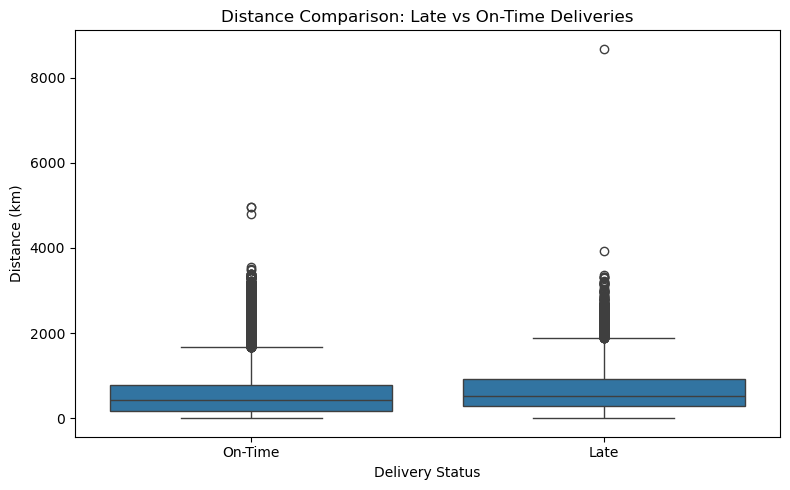

In [46]:
# Filter valid rows (non-null, non-zero distances)
df_valid = df_cleaned[
    (df_cleaned["distance_seller_customer_km"].notnull()) &
    (df_cleaned["late_delivery"].isin([0, 1]))
]

# Split into late and on-time
late_deliveries = df_valid[df_valid["late_delivery"] == 1]["distance_seller_customer_km"]
on_time_deliveries = df_valid[df_valid["late_delivery"] == 0]["distance_seller_customer_km"]

# Summary stats
print("Average Distance (Late):", late_deliveries.mean())
print("Average Distance (On-Time):", on_time_deliveries.mean())
print("Median Distance (Late):", late_deliveries.median())
print("Median Distance (On-Time):", on_time_deliveries.median())

# Perform a t-test
t_stat, p_value = ttest_ind(late_deliveries, on_time_deliveries, equal_var=False)
print(f"\nT-test: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")

# Boxplot to visualize
plt.figure(figsize=(8, 5))
sns.boxplot(x="late_delivery", y="distance_seller_customer_km", data=df_valid)
plt.xticks([0, 1], ['On-Time', 'Late'])
plt.title("Distance Comparison: Late vs On-Time Deliveries")
plt.xlabel("Delivery Status")
plt.ylabel("Distance (km)")
plt.tight_layout()
plt.show()

In [47]:
# List of fixed-date national holidays in Brazil (format: MM-DD)
brazil_holidays = [
    "01-01",  # New Year's Day
    "04-21",  # Tiradentes Day
    "05-01",  # Labor Day
    "09-07",  # Independence Day
    "10-12",  # Our Lady of Aparecida
    "11-02",  # All Souls’ Day
    "11-15",  # Republic Day
    "12-25"   # Christmas Day
]

# Extract MM-DD from the timestamp
df_cleaned["purchase_mm_dd"] = df_cleaned["order_purchase_timestamp"].dt.strftime("%m-%d")

# Create holiday flag: 1 if purchase was made on a national holiday, else 0
df_cleaned["is_national_holiday"] = df_cleaned["purchase_mm_dd"].isin(brazil_holidays).astype(int)

# Drop helper column if you don't need it
df_cleaned.drop(columns=["purchase_mm_dd"], inplace=True)

# Preview result
df_cleaned[["order_purchase_timestamp", "is_national_holiday"]].head()


,order_purchase_timestamp,is_national_holiday
0,2017-10-02 10:56:33,0
1,2018-07-24 20:41:37,0
2,2018-08-08 08:38:49,0
3,2017-11-18 19:28:06,0
4,2018-02-13 21:18:39,0


/var/folders/13/3qsjyhzx365f0qdkt8rlzvvh0000gn/T/ipykernel_91460/3218130603.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="is_national_holiday", y="late_delivery", data=holiday_late_rate, palette="Set2")


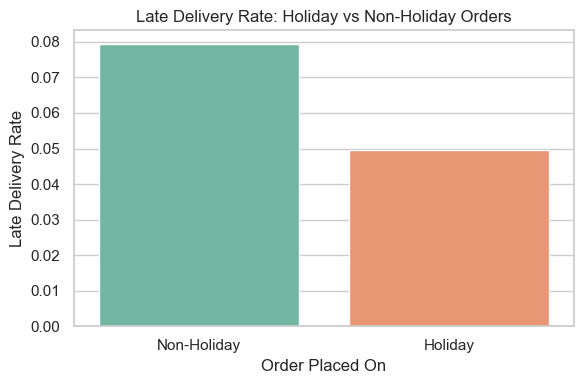

In [48]:
# Set plot style
sns.set(style="whitegrid")

# 1. Bar plot: Late delivery rate for holiday vs non-holiday orders
holiday_late_rate = df_cleaned.groupby("is_national_holiday")["late_delivery"].mean().reset_index()
holiday_late_rate["is_national_holiday"] = holiday_late_rate["is_national_holiday"].map({0: "Non-Holiday", 1: "Holiday"})

plt.figure(figsize=(6, 4))
sns.barplot(x="is_national_holiday", y="late_delivery", data=holiday_late_rate, palette="Set2")
plt.title("Late Delivery Rate: Holiday vs Non-Holiday Orders")
plt.xlabel("Order Placed On")
plt.ylabel("Late Delivery Rate")
plt.tight_layout()
plt.show()


In [49]:
# 1. Extract weekday from purchase timestamp (0=Monday, ..., 6=Sunday)
df_cleaned["order_purchase_weekday"] = df_cleaned["order_purchase_timestamp"].dt.weekday

# 2. Create weekend flag (1 if Saturday/Sunday, else 0)
df_cleaned["is_weekend"] = df_cleaned["order_purchase_weekday"].isin([5, 6]).astype(int)

# 3. Calculate late delivery rate by weekday
weekday_late = df_cleaned.groupby("order_purchase_weekday")["late_delivery"].mean().reset_index()
weekday_late.columns = ["Weekday", "Late_Delivery_Rate"]

# 4. Calculate late delivery rate by weekend/weekday
weekend_late = df_cleaned.groupby("is_weekend")["late_delivery"].mean().reset_index()
weekend_late["Type"] = weekend_late["is_weekend"].map({0: "Weekday", 1: "Weekend"})



/var/folders/13/3qsjyhzx365f0qdkt8rlzvvh0000gn/T/ipykernel_91460/219783581.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Type", y="late_delivery", data=weekend_late, palette="Set2")


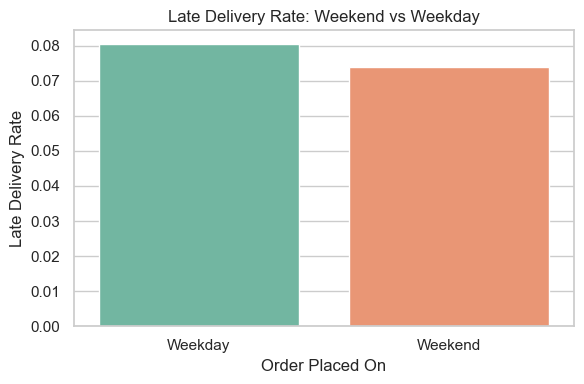

In [50]:
# Plot 2: Weekend vs Weekday Late Delivery Rate
plt.figure(figsize=(6, 4))
sns.barplot(x="Type", y="late_delivery", data=weekend_late, palette="Set2")
plt.title("Late Delivery Rate: Weekend vs Weekday")
plt.xlabel("Order Placed On")
plt.ylabel("Late Delivery Rate")
plt.tight_layout()
plt.show()

In [51]:
# 1. Flag orders with multiple items
items_per_order = df_cleaned.groupby("order_id")["order_item_id"].count()
df_cleaned["has_multiple_items"] = df_cleaned["order_id"].map(lambda x: int(items_per_order[x] > 1))

# 2. Flag orders with multiple sellers
sellers_per_order = df_cleaned.groupby("order_id")["seller_id"].nunique()
df_cleaned["has_multiple_sellers"] = df_cleaned["order_id"].map(lambda x: int(sellers_per_order[x] > 1))

# 3. Flag where both conditions are met
df_cleaned["has_multiple_items_and_sellers"] = (
    (df_cleaned["has_multiple_items"] == 1) & (df_cleaned["has_multiple_sellers"] == 1)
).astype(int)

/var/folders/13/3qsjyhzx365f0qdkt8rlzvvh0000gn/T/ipykernel_91460/543203130.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Condition", y="late_delivery", data=late_by_flag, palette="Set2")


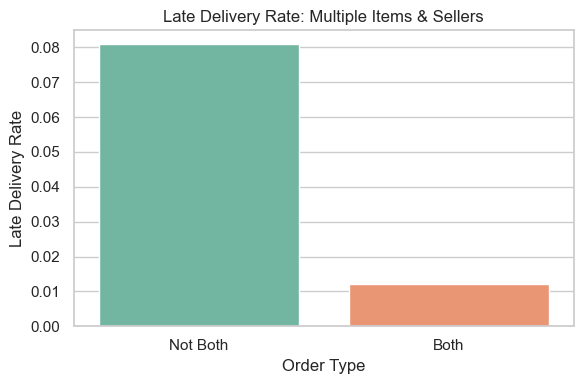

In [52]:
# 4. Group by flag and compute late delivery rates
late_by_flag = df_cleaned.groupby("has_multiple_items_and_sellers")["late_delivery"].mean().reset_index()
late_by_flag["Condition"] = late_by_flag["has_multiple_items_and_sellers"].map({0: "Not Both", 1: "Both"})

# 5. Plot the comparison
plt.figure(figsize=(6, 4))
sns.barplot(x="Condition", y="late_delivery", data=late_by_flag, palette="Set2")
plt.title("Late Delivery Rate: Multiple Items & Sellers")
plt.xlabel("Order Type")
plt.ylabel("Late Delivery Rate")
plt.tight_layout()
plt.show()

/var/folders/13/3qsjyhzx365f0qdkt8rlzvvh0000gn/T/ipykernel_91460/2276722787.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Seller Setup", y="late_delivery", data=late_by_seller_count, palette="Set1")


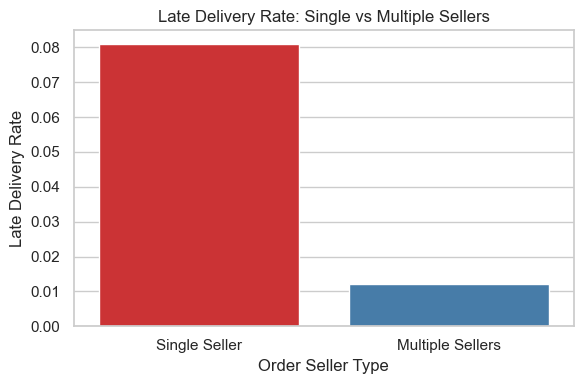

Late delivery rate by seller count:
       Seller Setup  late_delivery
0     Single Seller       0.080794
1  Multiple Sellers       0.012239


In [53]:
# 1. Group by has_multiple_sellers and calculate late delivery rate
late_by_seller_count = df_cleaned.groupby("has_multiple_sellers")["late_delivery"].mean().reset_index()
late_by_seller_count["Seller Setup"] = late_by_seller_count["has_multiple_sellers"].map({0: "Single Seller", 1: "Multiple Sellers"})

# 2. Plot late delivery rate
plt.figure(figsize=(6, 4))
sns.barplot(x="Seller Setup", y="late_delivery", data=late_by_seller_count, palette="Set1")
plt.title("Late Delivery Rate: Single vs Multiple Sellers")
plt.xlabel("Order Seller Type")
plt.ylabel("Late Delivery Rate")
plt.tight_layout()
plt.show()

# 3. Print late delivery rates numerically
print("Late delivery rate by seller count:")
print(late_by_seller_count[["Seller Setup", "late_delivery"]])

In [54]:
df_cleaned["has_multiple_sellers"].value_counts()

has_multiple_sellers
0    105614
1      3023
Name: count, dtype: int64

In [55]:
##Only 2.8% of orders involve multiple sellers.
##So even though late delivery rate is lower for multi-seller orders, the sample is relatively small.

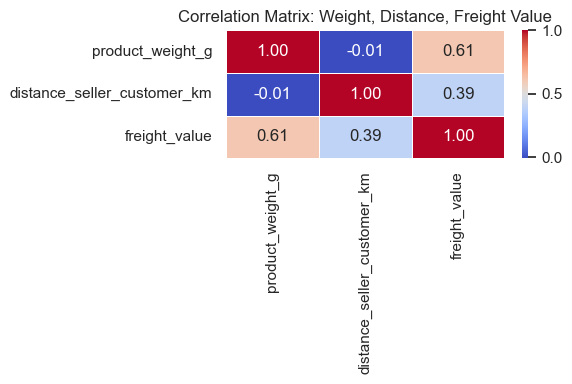

In [56]:
# Select relevant columns and drop missing values
corr_data = df_cleaned[[
    "product_weight_g",
    "distance_seller_customer_km",
    "freight_value"
]].dropna()

# Compute correlation matrix
corr_matrix = corr_data.corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix: Weight, Distance, Freight Value")
plt.tight_layout()
plt.show()

In [57]:
###Both weight and distance affect freight cost, but weight has a stronger impact

In [58]:
# Ensure datetime columns are in correct format
df_cleaned["order_delivered_carrier_date"] = pd.to_datetime(df_cleaned["order_delivered_carrier_date"], errors='coerce')
df_cleaned["order_estimated_delivery_date"] = pd.to_datetime(df_cleaned["order_estimated_delivery_date"], errors='coerce')

# Create flag
df_cleaned["given_to_carrier_after_estimated"] = (
    df_cleaned["order_delivered_carrier_date"] > df_cleaned["order_estimated_delivery_date"]
).astype(int)

# View how many cases this occurred
counts = df_cleaned["given_to_carrier_after_estimated"].value_counts()
print("Count of parcels handed over to courier after estimated delivery date:")
print(counts)

# Late delivery rate for these cases
late_rate_check = df_cleaned.groupby("given_to_carrier_after_estimated")["late_delivery"].mean().reset_index()
late_rate_check.columns = ["Given After Estimate", "Late Delivery Rate"]
print("\nLate delivery rate comparison:")
print(late_rate_check)

Count of parcels handed over to courier after estimated delivery date:
given_to_carrier_after_estimated
0    108116
1       521
Name: count, dtype: int64

Late delivery rate comparison:
   Given After Estimate  Late Delivery Rate
0                     0            0.074448
1                     1            1.000000


In [59]:
print(df_cleaned.columns)

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'product_category_name_english', 'late_delivery',
       'order_purchase_month', 'order_purchase_weekday', 'order_month',
       'product_volume_cm3', 'product_weight_kg', 'product_bulk_score',
       'same_state', 'customer_lat', 'customer_lng', 'seller_lat',
       'seller_lng', 'distance_seller_customer_km', 'is

In [60]:
df_cleaned.to_csv("df_cleaned.csv", index=False)

In [61]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
)

In [62]:
# Select the best features
features = [
    "freight_value", "price", "product_weight_g", "product_volume_cm3", "product_bulk_score",
    "product_photos_qty", "product_description_lenght", "distance_seller_customer_km",
    "order_purchase_weekday", "order_purchase_month", "is_weekend", "is_national_holiday",
    "has_multiple_items", "has_multiple_sellers", "has_multiple_items_and_sellers",
    "given_to_carrier_after_estimated",
    "same_state"
]

In [63]:
# Drop missing values
df_model = df_cleaned[features + ["late_delivery"]].dropna()
X = df_model[features]
y = df_model["late_delivery"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

log_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
# Choose scoring metric
scoring = 'roc_auc'

# Perform 5-fold CV
log_scores = cross_val_score(log_model, X_scaled, y, cv=5, scoring=scoring)
print("Logistic Regression AUC: {:.3f} ± {:.3f}".format(np.mean(log_scores), np.std(log_scores)))

Logistic Regression AUC: 0.633 ± 0.005


In [64]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train logistic regression with class_weight='balanced'
log_model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
log_model.fit(X_train, y_train)

# Make predictions
y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:, 1]

In [65]:
logreg_coefficients = pd.Series(log_model.coef_[0], index=X.columns)
logreg_sorted = logreg_coefficients.sort_values(key=abs, ascending=False)

print("🔹 Top 10 Important Features - Logistic Regression (by absolute coefficient):\n")
print(logreg_sorted.head(10))

🔹 Top 10 Important Features - Logistic Regression (by absolute coefficient):

given_to_carrier_after_estimated    0.926883
distance_seller_customer_km         0.201796
same_state                         -0.157580
has_multiple_items_and_sellers     -0.134669
has_multiple_sellers               -0.134669
order_purchase_month               -0.096269
product_weight_g                    0.070626
has_multiple_items                 -0.058286
is_national_holiday                -0.056046
product_volume_cm3                  0.049341
dtype: float64


In [66]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6085468504301175
Precision: 0.11499487646590004
Recall: 0.5937683715461494
F1 Score: 0.19267455169782527
ROC AUC: 0.6359308864370524
Confusion Matrix:
 [[12148  7773]
 [  691  1010]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.61      0.74     19921
           1       0.11      0.59      0.19      1701

    accuracy                           0.61     21622
   macro avg       0.53      0.60      0.47     21622
weighted avg       0.88      0.61      0.70     21622



In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
target = "late_delivery"

# Step 3: Prepare data
df_model = df_cleaned[features + [target]].dropna()
X = df_model[features]
y = df_model[target]

# Step 4: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
# Choose scoring metric
scoring = 'roc_auc'

# Perform 5-fold cross-validation
rf_scores = cross_val_score(rf_model, X_scaled, y, cv=5, scoring=scoring)

# Print the results
print("Random Forest AUC: {:.3f} ± {:.3f}".format(np.mean(rf_scores), np.std(rf_scores)))

Random Forest AUC: 0.717 ± 0.003


In [69]:
# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Step 6: Train Random Forest with class_weight='balanced'
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

rf_feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("🔹 Top 10 Important Features - Random Forest:\n")
print(rf_feature_importance.head(10))

🔹 Top 10 Important Features - Random Forest:

distance_seller_customer_km    0.142693
order_purchase_month           0.115579
freight_value                  0.111210
product_description_lenght     0.101813
price                          0.100849
product_bulk_score             0.092582
product_volume_cm3             0.092215
product_weight_g               0.083010
order_purchase_weekday         0.050325
product_photos_qty             0.035921
dtype: float64


In [70]:
# Step 8: Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9337249098140783
Precision: 0.8284313725490197
Recall: 0.1987066431510876
F1 Score: 0.3205310573731626
ROC AUC: 0.7880204408825796
Confusion Matrix:
 [[19851    70]
 [ 1363   338]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     19921
           1       0.83      0.20      0.32      1701

    accuracy                           0.93     21622
   macro avg       0.88      0.60      0.64     21622
weighted avg       0.93      0.93      0.91     21622



In [71]:
import xgboost as xgb

In [72]:
# Prepare the data
df_model = df_cleaned[features + [target]].dropna()
X = df_model[features]
y = df_model[target]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [73]:
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    scale_pos_weight=(y == 0).sum() / (y == 1).sum(),
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
# Choose scoring metric
scoring = 'roc_auc'

# Perform 5-fold cross-validation
xgb_scores = cross_val_score(xgb_model, X_scaled, y, cv=5, scoring=scoring)

# Print the results
print("XGBoost AUC: {:.3f} ± {:.3f}".format(np.mean(xgb_scores), np.std(xgb_scores)))

/opt/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:09:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:09:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:09:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:09:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

XGBoost AUC: 0.742 ± 0.005


In [74]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Calculate scale_pos_weight based on class imbalance
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

# Train XGBoost model with scale_pos_weight
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]



/opt/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:09:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [75]:
# XGBoost Feature Importance
xgb_feature_importance = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("🔹 Top 10 Important Features - XGBoost:\n")
print(xgb_feature_importance.head(10))

🔹 Top 10 Important Features - XGBoost:

given_to_carrier_after_estimated    0.374186
order_purchase_month                0.130585
same_state                          0.113923
has_multiple_sellers                0.081772
freight_value                       0.047200
distance_seller_customer_km         0.041519
has_multiple_items                  0.029689
product_weight_g                    0.024675
product_volume_cm3                  0.024299
product_bulk_score                  0.023043
dtype: float32


In [76]:
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7468319304412173
Precision: 0.18709570409686516
Recall: 0.6631393298059964
F1 Score: 0.291849935316947
ROC AUC: 0.7758041973024488
Confusion Matrix:
 [[15020  4901]
 [  573  1128]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.75      0.85     19921
           1       0.19      0.66      0.29      1701

    accuracy                           0.75     21622
   macro avg       0.58      0.71      0.57     21622
weighted avg       0.90      0.75      0.80     21622



In [77]:
# Logistic Regression
y_prob_log = log_model.predict_proba(X_test)[:, 1]
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
roc_auc_log = auc(fpr_log, tpr_log)

# Random Forest
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# XGBoost
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

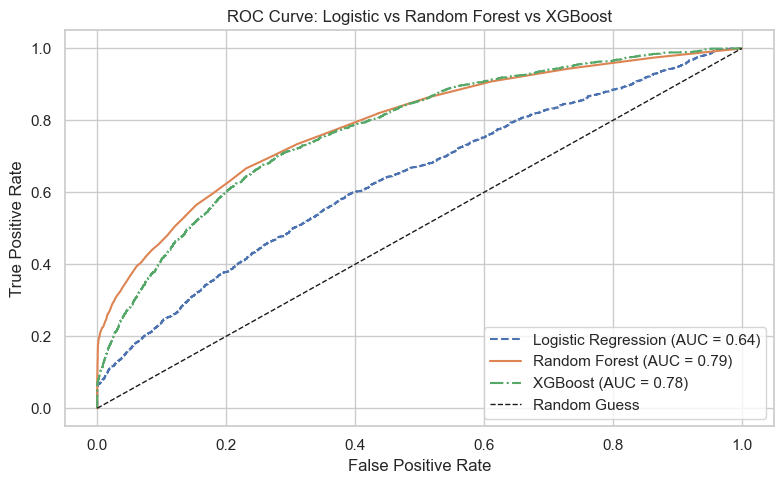

In [78]:
# ----- Plot all three ROC curves -----
plt.figure(figsize=(8, 5))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})', linestyle='--')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', linestyle='-')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})', linestyle='-.')
plt.plot([0, 1], [0, 1], 'k--', lw=1, label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Logistic vs Random Forest vs XGBoost')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()